### **EMBER 2023 YEARLY ELECTRICITY DATA - CALCULATION OF GRID INTENSITY AND ENERGY MIX**


**ACCESS TO EMBER 2023 YEARLY ELECTRICITY DATA**

We do not need to download the file locally. Instead, we call it directly from the website. To verify whether the notebook reads the file, we run print(df.head()) command.

In [9]:
import pandas as pd

# URL of the CSV file
url = "https://storage.googleapis.com/emb-prod-bkt-publicdata/public-downloads/yearly_full_release_long_format.csv"

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head(2))

          Area Country code  Year Area type Continent Ember region   EU  OECD  \
0  Afghanistan          AFG  2000   Country      Asia         Asia  0.0   0.0   
1  Afghanistan          AFG  2000   Country      Asia         Asia  0.0   0.0   

   G20   G7  ASEAN  Category     Subcategory Variable Unit  Value  \
0  0.0  0.0    0.0  Capacity  Aggregate fuel    Clean   GW   0.19   
1  0.0  0.0    0.0  Capacity  Aggregate fuel   Fossil   GW   0.03   

   YoY absolute change  YoY % change  
0                  NaN           NaN  
1                  NaN           NaN  


Now that we have access to the file, we can work on it to find out several information about grid intensity, energy mix and so on.

**ENERGY MIX**

We will now calculate 'World' energy mix for 2023.

In [10]:
# Filter the data for the latest year, specific countries, and other conditions
energy_mix_components = ['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
                         'Other Fossil', 'Other Renewables', 'Solar', 'Wind']
latest_year = 2023
countries = ['World']  # Add other countries if and when needed

# Apply filtering
filtered_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Electricity generation') &
    (df['Subcategory'] == 'Fuel') &
    (df['Variable'].isin(energy_mix_components)) &
    (df['Unit'] == '%')
]

# Display the filtered DataFrame
print(filtered_df[['Area', 'Year', 'Category', 'Variable', 'Unit', 'Value']])

         Area  Year                Category          Variable Unit  Value
340439  World  2023  Electricity generation         Bioenergy    %   2.32
340440  World  2023  Electricity generation              Coal    %  35.44
340441  World  2023  Electricity generation               Gas    %  22.54
340442  World  2023  Electricity generation             Hydro    %  14.18
340443  World  2023  Electricity generation           Nuclear    %   9.10
340444  World  2023  Electricity generation      Other Fossil    %   2.78
340445  World  2023  Electricity generation  Other Renewables    %   0.30
340446  World  2023  Electricity generation             Solar    %   5.55
340447  World  2023  Electricity generation              Wind    %   7.80


**VISUALIZATION**

We visualize the energy mix using matplotlib library.

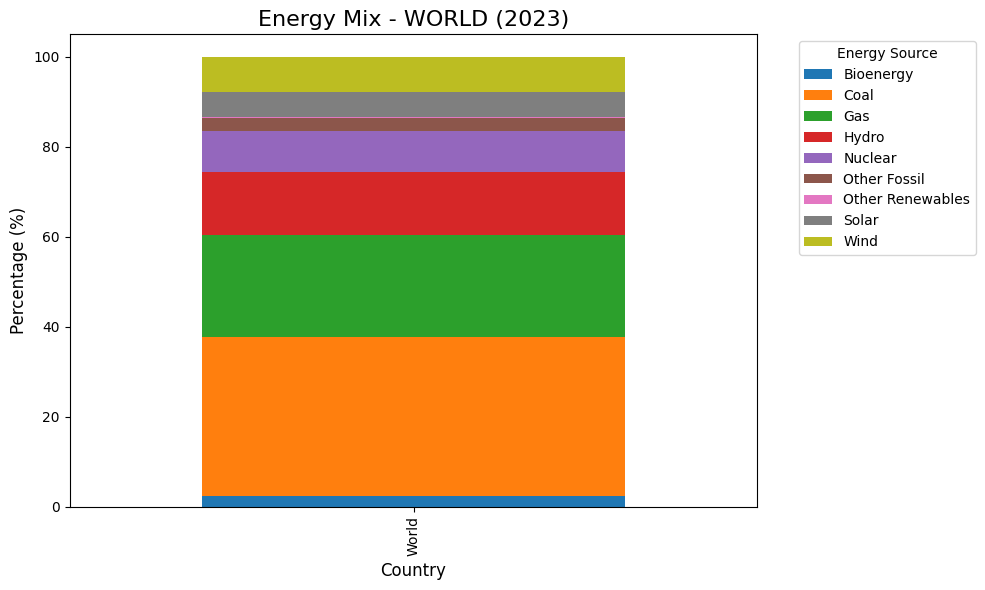

In [11]:
import matplotlib.pyplot as plt

# Pivot the DataFrame for visualization
pivot_df = filtered_df.pivot(index='Area', columns='Variable', values='Value')

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Add chart labels and title
plt.title('Energy Mix - WORLD (2023)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

**GRID INTENSITY**

We are now able to calculate the grid intensity. We calculate it for the 'World', at global level.

In [12]:
# Filter the data for the latest year, specific countries, and other conditions
energy_mix_components = ['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
                         'Other Fossil', 'Other Renewables', 'Solar', 'Wind']
latest_year = 2023
countries = ['World']  # Add other countries if and when needed

# Apply filtering
filtered_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Power sector emissions') &
    (df['Subcategory'] == 'CO2 intensity') &
    (df['Variable'] == 'CO2 intensity') &
    (df['Unit'] == 'gCO2/kWh')
]

# Display the filtered DataFrame
print(filtered_df[['Area', 'Year', 'Category', 'Variable', 'Unit', 'Value']])


         Area  Year                Category       Variable      Unit  Value
340465  World  2023  Power sector emissions  CO2 intensity  gCO2/kWh  481.6


NOTE: Compared to the IEA grid intensity 458 gCO2/kWh, EMBER's grid intensity is higher (ca. 482 gCO2/kWh).

**EMISSIONS PER ENERGY COMPONENT (in mtCO2)**

In [13]:
# Filter the data for the latest year, specific countries, and other conditions
energy_mix_components = ['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
                         'Other Fossil', 'Other Renewables', 'Solar', 'Wind']
latest_year = 2023
countries = ['World']  # Add other countries if and when needed

# Apply filtering
filtered_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Power sector emissions') &
    (df['Subcategory'] == 'Fuel') &
    (df['Variable'].isin(energy_mix_components)) &
    (df['Unit'] == 'mtCO2')
]

# Display the filtered DataFrame
print(filtered_df[['Area', 'Year', 'Category', 'Variable', 'Unit', 'Value']])

         Area  Year                Category          Variable   Unit    Value
340466  World  2023  Power sector emissions         Bioenergy  mtCO2   148.19
340467  World  2023  Power sector emissions              Coal  mtCO2  9450.31
340468  World  2023  Power sector emissions               Gas  mtCO2  3876.65
340469  World  2023  Power sector emissions             Hydro  mtCO2    99.57
340470  World  2023  Power sector emissions           Nuclear  mtCO2    13.86
340471  World  2023  Power sector emissions      Other Fossil  mtCO2   540.49
340472  World  2023  Power sector emissions  Other Renewables  mtCO2     3.33
340473  World  2023  Power sector emissions             Solar  mtCO2    77.93
340474  World  2023  Power sector emissions              Wind  mtCO2    26.82


**ELECTRICITY GENERATION PER ENERGY COMPONENT (in TWh)**

In [14]:
# Filter the data for the latest year, specific countries, and other conditions
energy_mix_components = ['Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
                         'Other Fossil', 'Other Renewables', 'Solar', 'Wind']
latest_year = 2023
countries = ['World']  # Add other countries as needed

# Apply filtering
filtered_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Electricity generation') &
    (df['Subcategory'] == 'Fuel') &
    (df['Variable'].isin(energy_mix_components)) &
    (df['Unit'] == 'TWh')
]

# Display the filtered DataFrame
print(filtered_df[['Area', 'Year', 'Category', 'Variable', 'Unit', 'Value']])

         Area  Year                Category          Variable Unit     Value
340448  World  2023  Electricity generation         Bioenergy  TWh    685.44
340449  World  2023  Electricity generation              Coal  TWh  10477.22
340450  World  2023  Electricity generation               Gas  TWh   6662.78
340451  World  2023  Electricity generation             Hydro  TWh   4190.65
340452  World  2023  Electricity generation           Nuclear  TWh   2689.39
340453  World  2023  Electricity generation      Other Fossil  TWh    821.41
340454  World  2023  Electricity generation  Other Renewables  TWh     88.58
340455  World  2023  Electricity generation             Solar  TWh   1639.98
340456  World  2023  Electricity generation              Wind  TWh   2306.64



**EMISSION FACTORS**

EMBER provides data that enables users to calculate emission factors for energy mix components. Thus, emission factors for the above-mentioned components (bioenergy, coal, gas, hydro, nuclear, other fossil, other renewables, solar, and wind) can be calculated. For a detailed view of the relevant explanation and limitations to the underlying factors, visit EMBER's website.

For the sake of the general view for now, here are the emission factors at global level (World as Area). Please note emission factors normally change from country to another country otherwise.

In [15]:
# Filter emissions data
emissions_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Power sector emissions') &
    (df['Subcategory'] == 'Fuel') &
    (df['Variable'].isin(energy_mix_components)) &
    (df['Unit'] == 'mtCO2')
][['Variable', 'Value']].rename(columns={'Value': 'Emissions (mtCO2)'})

# Filter generation data
generation_df = df[
    (df['Area'].isin(countries)) &
    (df['Year'] == latest_year) &
    (df['Category'] == 'Electricity generation') &
    (df['Subcategory'] == 'Fuel') &
    (df['Variable'].isin(energy_mix_components)) &
    (df['Unit'] == 'TWh')
][['Variable', 'Value']].rename(columns={'Value': 'Generation (TWh)'})

# Merge emissions and generation data on the 'Variable' column
merged_df = pd.merge(emissions_df, generation_df, on='Variable')

# Calculate emission factors (gCO2/kWh)
merged_df['Emission Factor (gCO2/kWh)'] = (merged_df['Emissions (mtCO2)'] / merged_df['Generation (TWh)']) * 1000

# Select only the Variable and Emission Factor columns for the final output
final_df = merged_df[['Variable', 'Emission Factor (gCO2/kWh)']]

# Display the final DataFrame
print(final_df)


           Variable  Emission Factor (gCO2/kWh)
0         Bioenergy                  216.196895
1              Coal                  901.986405
2               Gas                  581.836711
3             Hydro                   23.760037
4           Nuclear                    5.153585
5      Other Fossil                  658.002703
6  Other Renewables                   37.593136
7             Solar                   47.518872
8              Wind                   11.627302


**EMISSION FACTORS VISUALIZED**

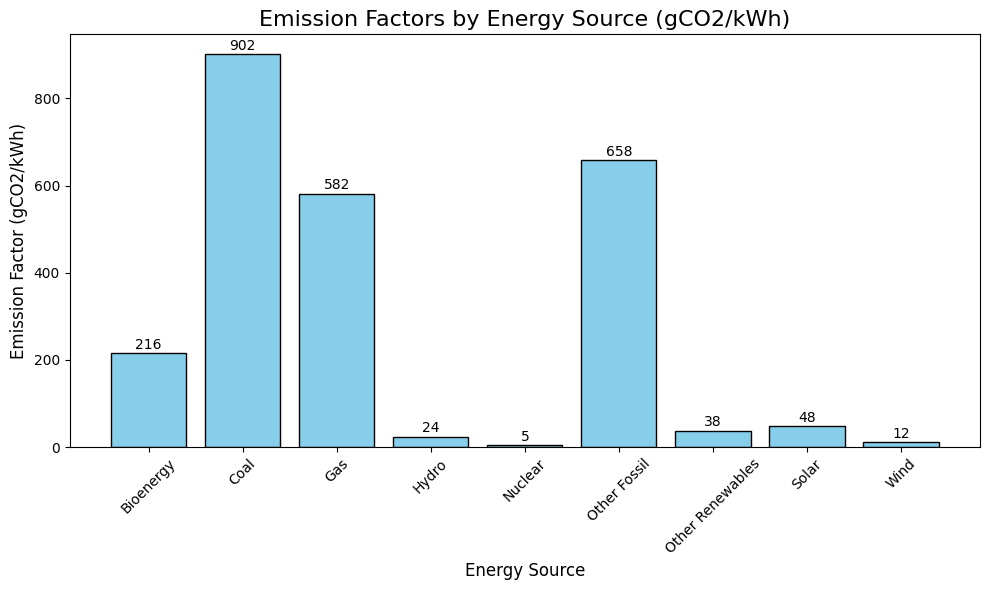

In [16]:
import matplotlib.pyplot as plt

# Plot a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(final_df['Variable'], final_df['Emission Factor (gCO2/kWh)'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Emission Factors by Energy Source (gCO2/kWh)', fontsize=16)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Emission Factor (gCO2/kWh)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add values on top of each bar (rounded to integer)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, str(round(yval)), ha='center', fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()
